<h1><center>Data Characteristics M3-Competition</center></h1>

### Config

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
pd.set_option('display.max_columns', None)
sns.set_context('notebook')

### Data

In [2]:
y_df = pd.read_parquet('/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M-Competitions/M3-Competition/Year/M3_yearly_processed.parquet')

q_df = pd.read_parquet('/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M-Competitions/M3-Competition/Quarter/M3_quarter_processed.parquet')

m_df = pd.read_parquet('/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M-Competitions/M3-Competition/Month/M3_month_processed.parquet')

In [3]:
y_df['Category'] = y_df['Category'].str.strip()
q_df['Category'] = q_df['Category'].str.strip()
m_df['Category'] = m_df['Category'].str.strip()

In [4]:
q_df.drop(columns='Measurement', inplace=True)

In [5]:
m_df.drop(columns='Measurement', inplace=True)

In [6]:
concatenated_df = pd.concat([y_df, q_df, m_df])

sorted_df = concatenated_df.sort_values(by=["Series", "Date"])

## Yearly Data

In [7]:
y_df.Category.unique()

array(['MICRO', 'INDUSTRY', 'MACRO', 'FINANCE', 'DEMOGRAPHIC', 'OTHER'],
      dtype=object)

In [8]:
category_counts = y_df['Category'].value_counts()

# Iterate over each unique value in the "category" column
for category, count in category_counts.items():
    print(f"Category: {category}, Observations: {count}")


Category: DEMOGRAPHIC, Observations: 6669
Category: INDUSTRY, Observations: 4355
Category: MICRO, Observations: 2920
Category: FINANCE, Observations: 2068
Category: MACRO, Observations: 1903
Category: OTHER, Observations: 404


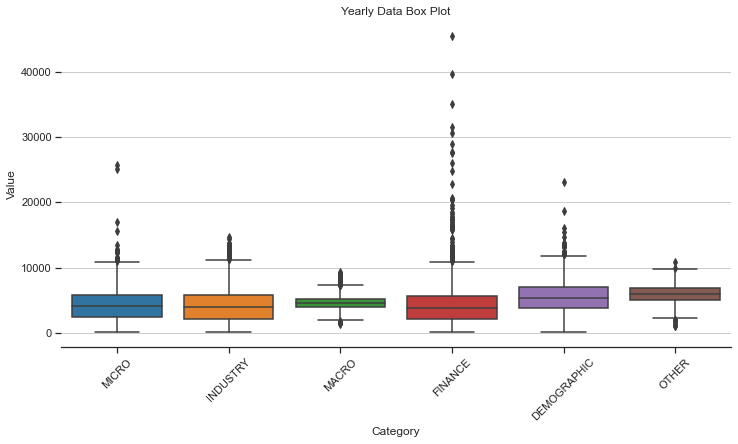

In [9]:
# Set the aesthetic style of the plots
sns.set_style("ticks")

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
boxplot = sns.boxplot(x='Category', y='Value', data=y_df)
sns.despine(left=True)  # Remove the left spine

plt.title('Yearly Data Box Plot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(axis='y')  # Add horizontal gridlines for better readability
plt.xticks(rotation=45)  # Rotate the category labels to avoid overlap

plt.show()

## Visualizations and Statistics for All Data

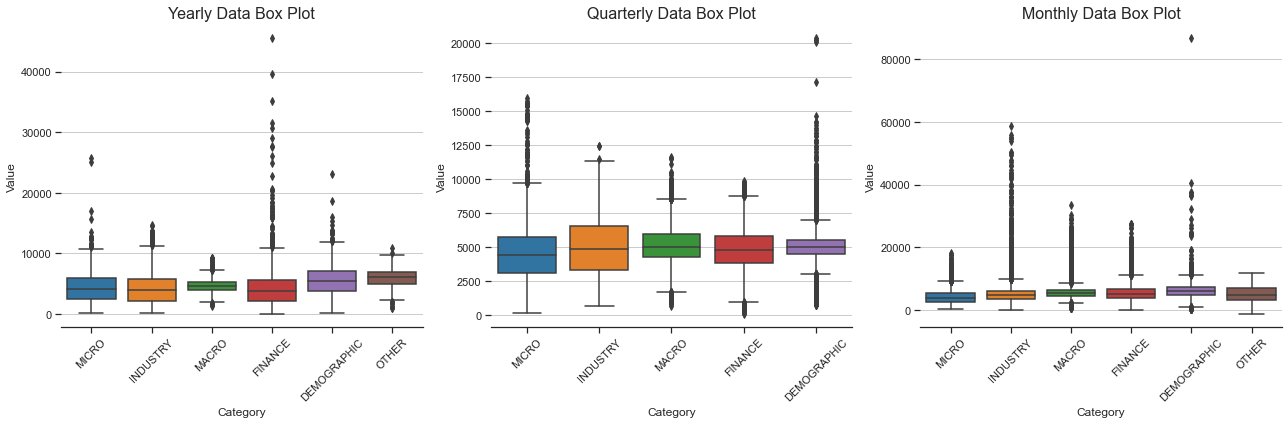

In [10]:
# Set the aesthetic style of the plots
sns.set_style("ticks")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed

# Yearly Data Plot
sns.boxplot(ax=axes[0], x='Category', y='Value', data=y_df)
axes[0].set_title('Yearly Data Box Plot', fontsize = 16)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Value')
axes[0].grid(axis='y')  # Add horizontal gridlines for better readability
axes[0].tick_params(axis='x', rotation=45)  # Rotate the category labels to avoid overlap

# Quarterly Data Plot
sns.boxplot(ax=axes[1], x='Category', y='Value', data=q_df)
axes[1].set_title('Quarterly Data Box Plot', fontsize = 16)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Value')
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=45)

# Monthly Data Plot
sns.boxplot(ax=axes[2], x='Category', y='Value', data=m_df)
axes[2].set_title('Monthly Data Box Plot', fontsize = 16)
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Value')
axes[2].grid(axis='y')
axes[2].tick_params(axis='x', rotation=45)

# Removing the left spine from all plots
sns.despine(left=True)

# Display the plot
plt.tight_layout()  # This automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

In [20]:
concatenated_df.loc[concatenated_df['Value'] < 0]

,Series,N,NF,Category,Value
Date,,,,,
1879-12-01,2786,96,18,OTHER,-1200.0


In [11]:
auto_df = concatenated_df
auto_df.set_index('Date', inplace=True)

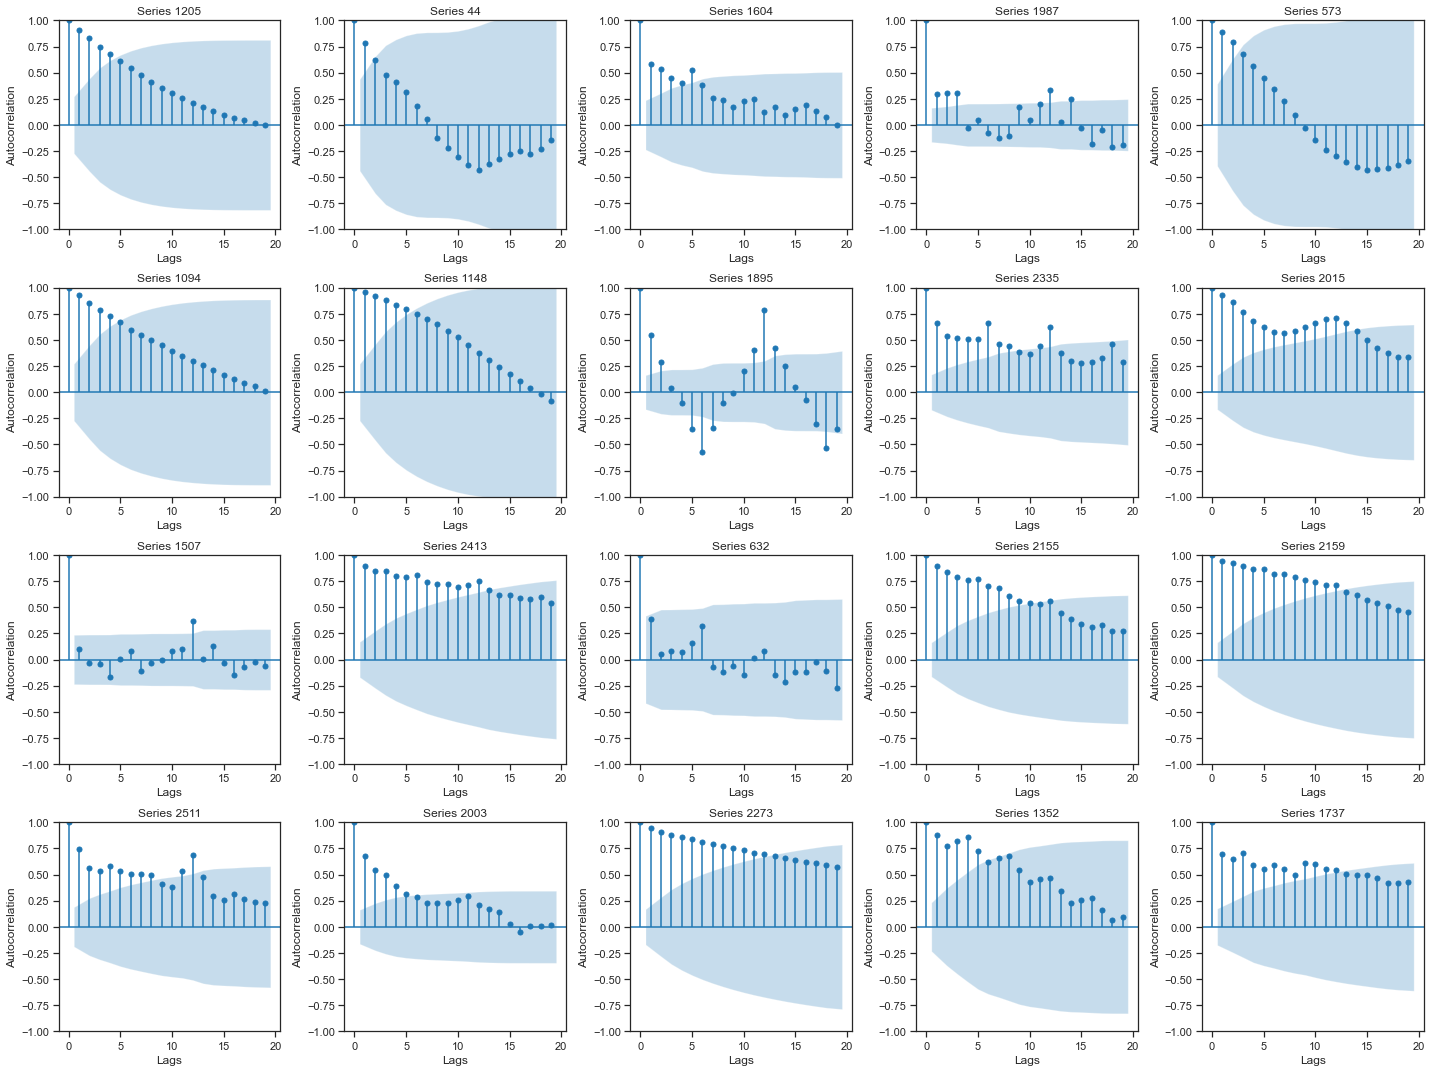

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# Sample a few series, stratifying if possible or randomly if not
sampled_series_ids = np.random.choice(auto_df['Series'].unique(), size=20, replace=False)

# Plotting
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten()

for i, series_id in enumerate(sampled_series_ids):
    series_data = auto_df[auto_df['Series'] == series_id]['Value']
    plot_acf(series_data, ax=axes[i], title=f'Series {series_id}', lags=19)
    axes[i].set_xlabel('Lags')
    axes[i].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()